# Sales Prediction with ML using Python

# Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Loading the Dataset

In [3]:
df = pd.read_csv("Advertising.csv")

# Analysis

In [10]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] #to remove the noise data
df.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [11]:
df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

# Visualising the Data

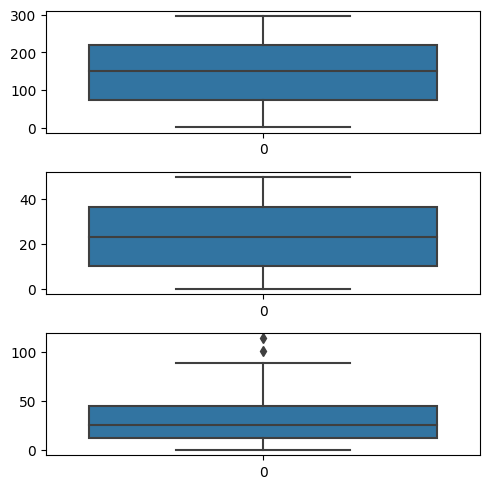

In [12]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Radio'],ax=axs[1])
plt3=sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()

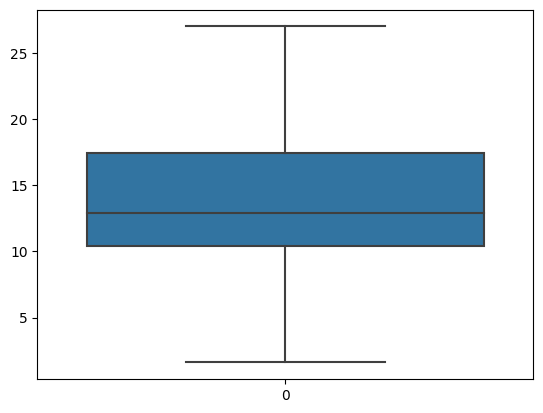

In [13]:
sns.boxplot(df['Sales'])
plt.show()

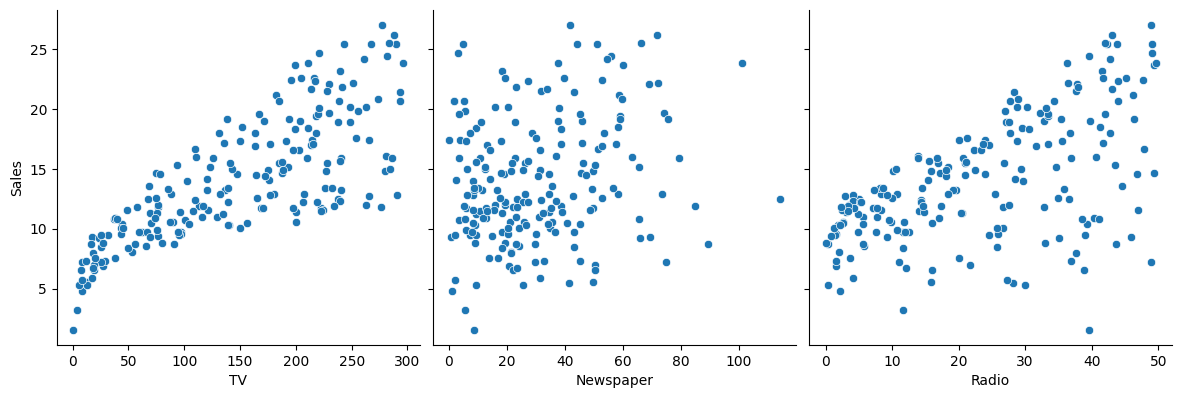

In [14]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

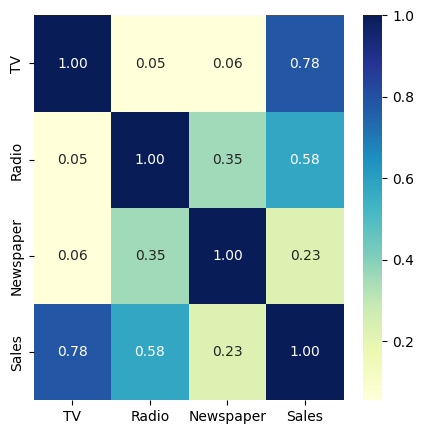

In [16]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

# Training & Testing of Dataset

According to the pairplot and heatmap, variable TV is most related to sales.

In [17]:
x = df['TV']
y = df['Sales']
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=100)

In [19]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()

In [20]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.84e-30
Time:                        20:38:54   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

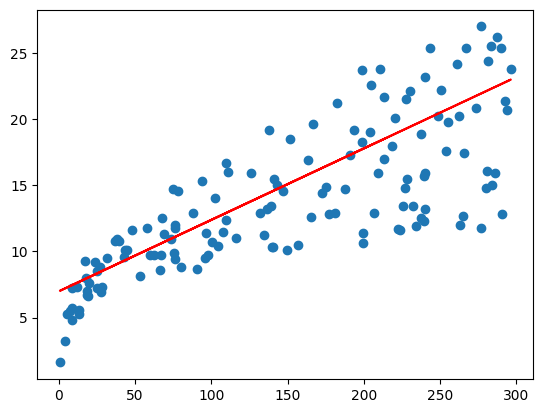

In [22]:
plt.scatter(x_train, y_train)
plt.plot(x_train,6.98+0.054*x_train,'r')
plt.show()